# Finding the best two markets to advertise in

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a [popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Exploring the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

print(fcc.head(5))
print(fcc.info())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN                 

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



## Checking for sample representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [2]:
print(fcc['JobRoleInterest'].value_counts(normalize=True) * 100)

Full-Stack Web Developer                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                       2.030892
  Mobile Developer                                                                                                                                                           1.673341
Game Developer                                                                            

The table shows very fine-grained results, and it shows that respondents are often interested in multiple subjects. Since the focus of interest is in promoting courses on web and mobile development, it makes sense to extract the occurences of aomeone expressing interest in being a "Web Developer" or "Mobile Developer". We will extract those (or similar) strings from the `JobRoleInterest` column and visualize, how many respondents mention either of these interest. This should make it clear, whether our sample contains enough cases of people representative of the group that we want to reach.

In [3]:
# Dropping cases with missing information
fcc_nona = fcc.dropna(subset=['JobRoleInterest'])

# Extracting cases with matching strings
pattern = r'Web Developer|Mobile Developer'

# Filtering matching rows
fcc_nona['target_group'] = fcc_nona['JobRoleInterest'].str.contains(pattern, case=False, regex=True, na=False)

print(fcc_nona['target_group'].value_counts(normalize=True) * 100)
freq_tab = fcc_nona['target_group'].value_counts(normalize=True).copy() * 100

True     86.270023
False    13.729977
Name: target_group, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



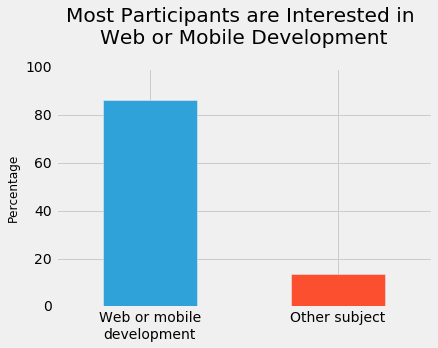

In [4]:
# Plotting the results
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
freq_tab.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

In our cleaned sample that only contains respondents with no missing values in the `JobRoleInterest` column (N=6032), we observe that 86% of respondents report an interest in either web or mobile development, which confirms that this sample is representative of the target group we want to reach.

## New Coders - Locations and Densities

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country). For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Let us just check potential markets by analysing the value counts of the `CountryLive` variable.

In [5]:
# Frequency tables with absolute and relative frequencies
absolute_frequencies = fcc_nona['CountryLive'].value_counts()
relative_frequencies = fcc_nona['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
table_freq_perc = pd.DataFrame(data = {'Absolute frequency': absolute_frequencies,
                     'Percentage': relative_frequencies})
table_freq_perc # or print(table_freq_perc)

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


According to these figures, our biggest potential market is the US (45% of respondents located), followed by much smaller shares of potential customers in India (7.72%), the UK (4.61%) and Canada (3.8%). But in order to extract the potential revenue that we can achieve, we need to also take into account how much each customer in those locations would be willing to pay.

## Spending Money for Learning

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends *per month*.

In [6]:
# Amount spent per month
fcc_nona['MonthsProgramming'] = np.where(fcc_nona['MonthsProgramming'] == 0, 1, fcc_nona['MonthsProgramming'])
fcc_nona['monthly'] = fcc_nona['MoneyForLearning'] / fcc_nona['MonthsProgramming']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [7]:
# How many NaNs?
num_nans = fcc_nona['monthly'].isna().sum()
print(num_nans)

675


In [8]:
# Drop NaNs in monthly and CountryLive
fcc_nona = fcc_nona.dropna(subset=['monthly'])
fcc_nona = fcc_nona.dropna(subset=['CountryLive'])

In [9]:
# Define countries of interest
country_selection = fcc_nona[fcc_nona['CountryLive'].isin(['United States of America',
                                                           'United Kingdom',
                                                           'India',
                                                           'Canada'])]

# Calculate monthly amounts by country and display in a dataframe
country_split = country_selection.groupby(['CountryLive'])
monthly_mean = country_split['monthly'].mean()
monthly_median = country_split['monthly'].median()
monthly_count = country_split['monthly'].count()

# Get the first mode for each country (handle cases with multiple modes)
monthly_mode = country_split['monthly'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Print results
table_mmm = pd.DataFrame(data = {'Mean': monthly_mean,
                     'Median': monthly_median,
                     'Mode': monthly_mode,
                     'Count': monthly_count           }
            ).sort_values(by='Mean', ascending=False)

print(table_mmm)

                          Count        Mean    Median  Mode
CountryLive                                                
United States of America   2933  227.997996  3.333333   0.0
India                       463  135.100982  0.000000   0.0
Canada                      240  113.510961  0.000000   0.0
United Kingdom              279   45.534443  0.000000   0.0


The results are interesting, but also somewhat surprising. First of all, the number of cases (Count) seems high enough for each country. But also, firstly, we see that there must be a fairly high amount of cases, where people spend zero mone on learning per month, as the mode for each country shows. The typical value is 0\$.
Secondly, the median spending per month is close to zero or zero in all our country samples. So the median customer does not spend any or very little money per month. 
Thirdly, the means for each country show monthly spending between 45\$ and 227\$, but the amount for India is a bit surprising. As the GDP per capita is lower than in the other countries a monthly mean spending of 135\$ in India seems unexpectedly high. Potentially there are outlying cases which draw the mean up.

## Dealing with extreme outliers

In order ot get a better idea of potential outliers in each country, we will draw a boxplot for each.

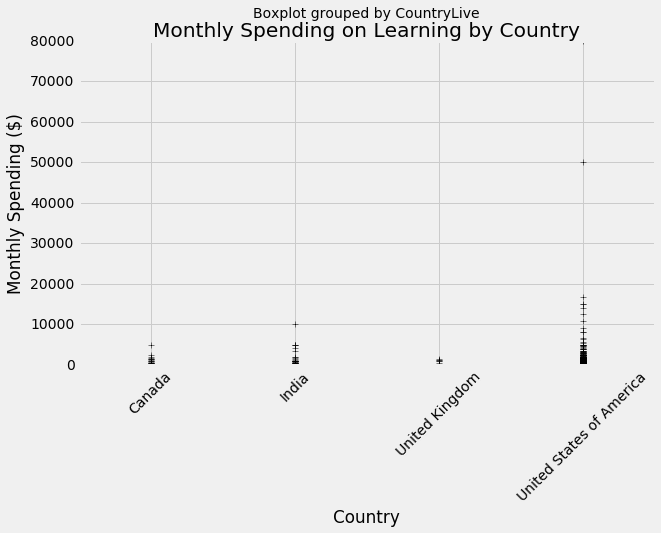

In [12]:
# Create boxplots for each country
country_selection.boxplot(column='monthly', by='CountryLive', figsize=(10, 6))
plt.title('Monthly Spending on Learning by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Spending ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

We  find that there are some extreme cases (such as 50k per month in the US), and we will remove these stepy by step.

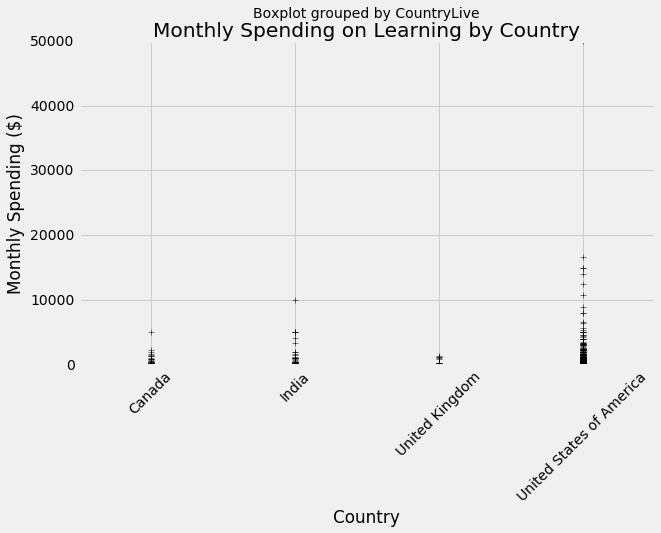

In [13]:
# Filter out extreme cases where 'monthly' spending is greater than 50,000
country_selection_filtered = country_selection[country_selection['monthly'] <= 50000]

# Create boxplots for each country
country_selection_filtered.boxplot(column='monthly', by='CountryLive', figsize=(10, 6))
plt.title('Monthly Spending on Learning by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Spending ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

This already looks better, but there are still some cases in India where people spend more than 5k per month on learning, which is unusual. We inspect these cases separately.

In [15]:
# Inspect the extreme outliers for India
india_outliers = country_selection_filtered[
    (country_selection_filtered['CountryLive'] == 'India') & 
    (country_selection_filtered['monthly'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,target_group,monthly
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,True,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,True,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,True,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. Respondents might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [16]:
# Remove the outliers for India
country_selection_filtered = country_selection_filtered.drop(india_outliers.index) # using the row labels

Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [17]:
# Examine the extreme outliers for the US
us_outliers = country_selection_filtered[
    (country_selection_filtered['CountryLive'] == 'United States of America') & 
    (country_selection_filtered['monthly'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,target_group,monthly
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,True,6500.000000
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,50000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,True,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,True,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,True,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,True,16666.666667


Out of these 12 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [20]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = country_selection_filtered[
    (country_selection_filtered['CountryLive'] == 'United States of America') & 
    (country_selection_filtered['monthly'] >= 6000) &
    (country_selection_filtered['AttendedBootcamp'] == 0)
]

country_selection_filtered = country_selection_filtered.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = country_selection_filtered[
    (country_selection_filtered['CountryLive'] == 'United States of America') & 
    (country_selection_filtered['monthly'] >= 6000) &
    (country_selection_filtered['MonthsProgramming'] <= 3)
]

country_selection_filtered = country_selection_filtered.drop(less_than_3_months.index)

Lastly, we still observe one person in Canada who spends more than 5k a month. Let's examine this one too.

In [21]:
# Examine the extreme outliers for the Canada
canada_outliers = country_selection_filtered[
    (country_selection_filtered['CountryLive'] == 'Canada') & 
    (country_selection_filtered['monthly'] >= 5000)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,target_group,monthly
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,True,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [22]:
# Remove the extreme outliers for Canada
country_selection_filtered = country_selection_filtered.drop(canada_outliers.index)

Let's look at the mean values again and replot the boxplots.

In [23]:
# Calculate monthly amounts by country and display in a dataframe
country_split = country_selection_filtered.groupby(['CountryLive'])
monthly_mean = country_split['monthly'].mean()
monthly_median = country_split['monthly'].median()
monthly_count = country_split['monthly'].count()

# Get the first mode for each country (handle cases with multiple modes)
monthly_mode = country_split['monthly'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Print results
table_mmm = pd.DataFrame(data = {'Mean': monthly_mean,
                     'Median': monthly_median,
                     'Mode': monthly_mode,
                     'Count': monthly_count           }
            ).sort_values(by='Mean', ascending=False)

print(table_mmm)

                          Count        Mean    Median  Mode
CountryLive                                                
United States of America   2920  142.654608  3.333333   0.0
Canada                      239   93.065400  0.000000   0.0
India                       457   65.758763  0.000000   0.0
United Kingdom              279   45.534443  0.000000   0.0


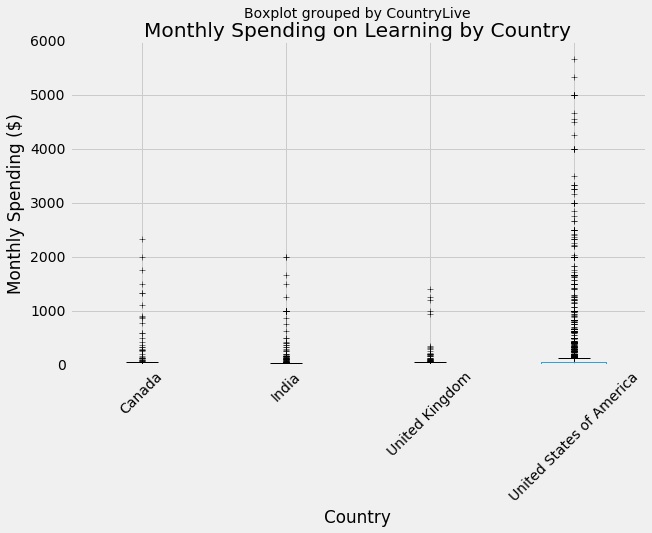

In [24]:
# Create boxplots for each country
country_selection_filtered.boxplot(column='monthly', by='CountryLive', figsize=(10, 6))
plt.title('Monthly Spending on Learning by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Spending ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

These results look a lot more reasonable. We find that the US (ca. 143\$ per month) and Canada (ca. 93\$ per month) seem to be good markets, followed by India (ca. 66\$) and the UK (ca. 46\$). The UK looks a little less attractive. But we probably should set these numbers in relation to the potential number of customers.

## Choosing the best two markets

While it looks reasonable to pick the US and Canada, let's check the potential market sizes.

In [26]:
# Frequency table for the 'CountryLive' column
country_selection_filtered['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Our largest potential market are the US with a share of 75% in our sample. But India ranks second in terms of size and has a potential for customers that is almost twice as large as the Canadian market. We can calculate the product of these shares and the mean values calculated before, to get an expected revenue for each market.

In [72]:
# Create DataFrames for calculation
shares = country_selection_filtered['CountryLive'].value_counts(normalize = True)
mm_df = pd.DataFrame(monthly_mean)
shares_df = pd.DataFrame(shares)
shares_df.columns = ['proportion']
mm_df.reset_index(inplace=True)
shares_df.reset_index(inplace=True)
shares_df.columns = ['CountryLive','proportion']
combined = pd.merge(mm_df, shares_df, on='CountryLive')

# Calculate expected revenue
combined['expected_revenue'] = combined['monthly'] * combined['proportion']
print(combined.sort_values(by='expected_revenue', ascending=False))

                CountryLive     monthly  proportion  expected_revenue
3  United States of America  142.654608    0.749679        106.945175
1                     India   65.758763    0.117330          7.715470
0                    Canada   93.065400    0.061361          5.710560
2            United Kingdom   45.534443    0.071630          3.261646


Based on this calculation, we would conclude that the expected revenue is highest in the US (106\$) and second higest in India (7.72\$). But the marketing team might reach a different conclusion and potentially weigh their budget to adjust for the size of each country.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.